In [1]:
'''
Ideas
-Make 1 lemmatized column and 1 stemmed column, to test which one creates more accurate results
'''


"\nIdeas\n-Make 1 lemmatized column and 1 stemmed column, to test which one creates more accurate results\n-Confusion matrix\n-Adding to the stopwords (like 'br', 'schedule', 'reported')\n-Rather than top 20 results for predicated results, do random set of 20 (or whatever n)\n"

In [1]:
from nlp_modelling import *

In [2]:
import data

In [2]:
#!jt -t monokai -T -N -kl -cellw 75%
#chesterish, grade3, gruvboxd, gruvboxl, monokai, oceans16, onedork, solarizedd ,solarizedl
#Default: !jt -r

In [3]:
#--Reading the data
df = pd.read_csv(data.DATA_DIR + '/incidents_2010_2019.csv', encoding = 'ANSI')

#--Trimming unnecessary columns
df = df[['IncidentCause', 'EventDescription', 'Category', 'IncidentDatetime']]

In [4]:
#--Replacing 'other' with 'Other' in 'Category'
df['Category'] = df['Category'].replace('other', 'Other')

#--Replacing 'AF other' with 'AF Other' in 'Category'
df['Category'] = df['Category'].replace('AF other', 'AF Other')

#--Replacing 'OH cable' with 'OH Cable' in 'Category'
df['Category'] = df['Category'].replace('OH cable', 'OH Cable')

#--Replacing 'Dug up' with 'Dug Up' in 'Category'
df['Category'] = df['Category'].replace('Dug up', 'Dug Up')

#--Replacing NULL values with empty strings in 'IncidentCause' and 'EventDescription'
df['IncidentCause'] = df['IncidentCause'].replace(np.nan, '')
df['EventDescription'] = df['EventDescription'].replace(np.nan, '')

In [5]:
#--Removing rows with 'Not reportable - delete' in 'Category'
df = df[df['Category'] != 'Not reportable - delete']

#--Removing rows with NaN in 'Category'
df = df[df['Category'].notnull()]

df = df.reset_index()

#df.isnull().any()

In [6]:
#--Creating a new column by merging the IncidentCause and EventDescripion columns
df['combined_text'] = df['IncidentCause'] + ' ' + df['EventDescription']

In [7]:
#--Making the processed text column all lowercase
df['processed_combined_text'] = df['combined_text'].str.lower()
df['processed_IncidentCause'] = df['IncidentCause'].str.lower()
df['processed_EventDescription'] = df['EventDescription'].str.lower()

#--Removing non-alphabetical characters
df['processed_combined_text'] = df['processed_combined_text'].str.replace(r'[^a-z]', ' ')
df['processed_IncidentCause'] = df['processed_IncidentCause'].str.replace(r'[^a-z]', ' ')
df['processed_EventDescription'] = df['processed_EventDescription'].str.replace(r'[^a-z]', ' ')

#--Removing excess whitespace between characters
df['processed_combined_text'] = df['processed_combined_text'].str.replace(r'^\s+', '')
df['processed_IncidentCause'] = df['processed_IncidentCause'].str.replace(r'^\s+', '')
df['processed_EventDescription'] = df['processed_EventDescription'].str.replace(r'^\s+', '')

In [8]:
#--Removing stopwords
stop_words = set(stopwords.words('english'))
newStopWords = ['br', 'scheduled', 'reported', 'report', 'schedule'] #'risk'
stop_words.update(newStopWords)
df['processed_combined_text'] = df['processed_combined_text'].apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))
df['processed_IncidentCause'] = df['processed_IncidentCause'].apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))
df['processed_EventDescription'] = df['processed_EventDescription'].apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))

In [18]:
#--Reduces words to their word root by stemming
#Can use Porter, Snowball

ps = PorterStemmer()
df['porter_stemmed_combined_text'] = df['processed_combined_text'].apply(lambda x: ' '.join(ps.stem(term) for term in x.split()))
df['porter_stemmed_IncidentCause'] = df['processed_IncidentCause'].apply(lambda x: ' '.join(ps.stem(term) for term in x.split()))
df['porter_stemmed_EventDescription'] = df['processed_EventDescription'].apply(lambda x: ' '.join(ps.stem(term) for term in x.split()))

sb = SnowballStemmer('english')
df['snowball_stemmed_combined_text'] = df['processed_combined_text'].apply(lambda x: ' '.join(sb.stem(term) for term in x.split()))
df['snowball_stemmed_IncidentCause'] = df['processed_IncidentCause'].apply(lambda x: ' '.join(sb.stem(term) for term in x.split()))
df['snowball_stemmed_EventDescription'] = df['processed_EventDescription'].apply(lambda x: ' '.join(sb.stem(term) for term in x.split()))

#--Reducing words to their base word by lemmatization
lem = WordNetLemmatizer()
df['lemmatized_combined_text'] = df['processed_combined_text'].apply(lambda x: ' '.join(lem.lemmatize(term) for term in x.split()))
df['lemmatized_IncidentCause'] = df['processed_IncidentCause'].apply(lambda x: ' '.join(lem.lemmatize(term) for term in x.split()))
df['lemmatized_EventDescription'] = df['processed_EventDescription'].apply(lambda x: ' '.join(lem.lemmatize(term) for term in x.split()))

#--Turns text into list of words
#df['processed_text_lem'] = df['processed_text_lem'].apply(word_tokenize)

In [10]:
#--Turning IncidentDatetime column into column of datetime objects
#2011-02-04 00:00:00
df['IncidentDatetime'] = pd.to_datetime(df['IncidentDatetime'], format = '%Y/%m/%d %H:%M:%S')

In [11]:
#Creating a new column that is 1 if the incident was prior to 2015, and 0 if otherwise
df['prior_to_2015'] = [ True if datetime.year < 2015 else False for datetime in df['IncidentDatetime'] ]

In [12]:
df

index  \
0          0   
1          1   
2          2   
3          3   
4          4   
5          5   
6          6   
7          7   
8          8   
9          9   
10        10   
11        11   
12        12   
13        13   
14        14   
15        15   
16        16   
17        17   
18        18   
19        19   
20        20   
21        21   
22        22   
23        23   
24        24   
25        25   
26        26   
27        27   
28        28   
29        29   
...      ...   
14981  14984   
14982  14985   
14983  14986   
14984  14987   
14985  14988   
14986  14989   
14987  14990   
14988  14991   
14989  14992   
14990  14993   
14991  14994   
14992  14995   
14993  14996   
14994  14997   
14995  14998   
14996  14999   
14997  15000   
14998  15001   
14999  15002   
15000  15003   
15001  15004   
15002  15005   
15003  15006   
15004  15007   
15005  15008   
15006  15009   
15007  15010   
15008  15011   
15009  15012   
15010  15013   

                                                                                                                                                                                                 IncidentCause  \
0                                                                                                                                                                                                                
1                                                                                                                                                                                                                
2                                                                                                                                                                                                                
3                                                                                                                                                                                                    line down   
4                                                                                                            PROPERTY DAMAGE - EG... CAR INTO POLE / TRUCK BRINGING DOWN LINE NOT INVOLVING PRIORITY 1 OUTCOME   
5                                                                                                                                                        Incident at Balmoral Rd, cnr Kimberly Rd, WARRNAMBOOL   
6                                                                                                                                                          Incident at Murchison Rd, cnr Station St, Murchison   
7                                                                                                                         Vehicle impact caused HV injection at Midland Highway, cnr Watson Street, Shepparton   
8                                                                                                                                                                                                                
9                                                                                                                                                                                                                
10                                                                                                                                                                                                               
11                                                                                                                                                                                                               
12                                                                                                                                                                                                               
13                                                                        

In [24]:
#text_clf_NB = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf', MultinomialNB())])
#text_clf_NB = text_clf_NB.fit(x_train, y_train)

#predicted = text_clf_NB.predict(x_test)
#np.mean(predicted == y_test)

In [13]:
def simple_model_testing(model, x_train, y_train, x_test, y_test):
    #[0]: Model constructor
    #[1]: Model name/description
    text_clf = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf', model[0])])
    trained_text_clf = text_clf.fit(x_train, y_train)

    cross_scores = cross_val_score(text_clf, x_train, y_train, cv = 10, scoring = 'balanced_accuracy')

    predicted = trained_text_clf.predict(x_test)

    print(model[1])
    #print('Simple accuracy:', )
    print('Balanced accuracy:', cross_scores.mean())
    #https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
    print(classification_report(y_test, predicted))

In [ ]:
#--Splitting the data into 70% training, 15% testing, 15% validation, keeps original 30% test set though
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(df['lemmatized_text'], df['Category'], test_size = 0.3)
x_validate_1, x_test_1_half, y_validate_1, y_test_1_half = train_test_split(x_test_1, y_test_1, test_size = 0.5)
#these are pandas series objects now, use .values to get the Categories

In [14]:
for i in range(0, 1):#len(default_models)):
    simple_model_testing(default_models[i], x_train_1, y_train_1, x_test_1, y_test_1)

SGD Classifier
Balanced accuracy: 0.6927318855833722
              precision    recall  f1-score   support

    AF Other       0.59      0.54      0.57       276
      Animal       0.92      0.86      0.89       162
   Conductor       0.72      0.38      0.50       121
  Connection       0.72      0.80      0.76       651
    Crossarm       0.82      0.91      0.86       414
      Dug Up       0.85      0.88      0.86       196
        Fuse       0.84      0.87      0.86       335
Installation       0.71      0.77      0.74       382
   Lightning       0.88      0.91      0.90        90
    OH Cable       0.63      0.41      0.50       168
       Other       0.82      0.79      0.81       578
        Pole       0.67      0.53      0.59       198
       Trees       0.82      0.95      0.88       355
    UG Cable       0.50      0.06      0.10        18
     Vehicle       0.89      0.91      0.90       560

   micro avg       0.79      0.79      0.79      4504
   macro avg       0.76    

In [ ]:
scoring_strategy = {'balanced_accuracy': make_scorer(balanced_accuracy_score),
                    'accuracy': make_scorer(accuracy_score),
                    'precision_weighted': make_scorer(precision_score, average = 'weighted'),
                    'recall_weighted': make_scorer(recall_score, average = 'weighted'),
                    'f1_weighted': make_scorer(f1_score, average = 'weighted')}
    
primary_score = 'balanced_accuracy'

------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------
Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   13.9s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  2.7min finished


SGD Classifier - hinge

Best parameters: {'clf__alpha': 0.0001, 'clf__l1_ratio': 0.2, 'clf__max_iter': 5, 'clf__penalty': 'elasticnet'}

Training cross-validation mean scores:
	balanced_accuracy       0.6983636776811509
	accuracy                0.7870943180736651
	precision_weighted      0.7811443811715664
	recall_weighted         0.7870943180736651
	f1_weighted             0.7784850609784206

Testing scores:
	balanced_accuracy       0.6965736213308857
	accuracy                0.7848579040852576
	precision_weighted      0.7792434545738424
	recall_weighted         0.7848579040852576
	f1_weighted             0.7754465006788389

              precision    recall  f1-score   support

    AF Other       0.65      0.44      0.52       276
      Animal       0.92      0.88      0.90       162
   Conductor       0.73      0.33      0.45       121
  Connection       0.70      0.81      0.75       651
    Crossarm       0.82      0.91      0.86       414
      Dug Up       0.83      0.89      0.

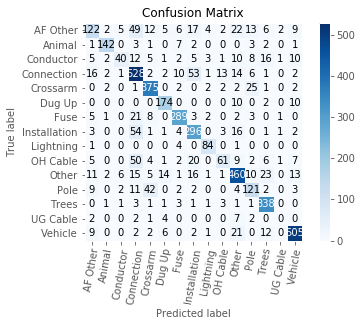

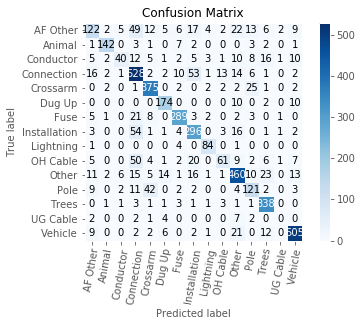

In [15]:
model_optimisation_and_testing(models_with_hyperparameter_sets[0], scoring_strategy, primary_score, x_train_1, y_train_1, x_test_1, y_test_1)

In [16]:
category_prediction_analysis(models_with_hyperparameter_sets[4], 'UG Cable')

------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------
SGD Classifier - hinge

Actual category: UG Cable
Predicted category:
	 Crossarm
	 Other
	 Dug Up
	 Dug Up
	 Pole
	 Dug Up
	 Connection
	 Connection
	 Other
	 Dug Up
	 Other
	 AF Other
	 Other
	 Other
	 AF Other
	 Other
	 Pole
	 Other


------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------
Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   21.2s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   43.6s finished


K-Nearest Neighbors

Best parameters: {'clf__leaf_size': 25, 'clf__n_neighbors': 5, 'clf__weights': 'distance'}

Training cross-validation mean scores:
	balanced_accuracy        0.574478405246051
	accuracy                0.6622255448325858
	precision_weighted      0.6764904405235315
	recall_weighted         0.6622255448325858
	f1_weighted             0.6589942377797546

Testing scores:
	balanced_accuracy       0.5688972876515647
	accuracy                0.6603019538188277
	precision_weighted       0.673234031526614
	recall_weighted         0.6603019538188277
	f1_weighted             0.6578312561517211

              precision    recall  f1-score   support

    AF Other       0.56      0.39      0.46       272
      Animal       0.75      0.52      0.61       149
   Conductor       0.36      0.20      0.26       115
  Connection       0.61      0.68      0.64       650
    Crossarm       0.66      0.84      0.74       432
      Dug Up       0.82      0.79      0.81       175
        Fus

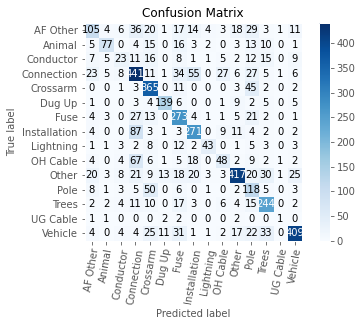

------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------
Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   23.4s finished


Decision Tree

Best parameters: {'clf__criterion': 'gini', 'clf__max_depth': 35}

Training cross-validation mean scores:
	balanced_accuracy       0.5810718704442859
	accuracy                0.6591767477685652
	precision_weighted      0.6611174332577197
	recall_weighted         0.6591767477685652
	f1_weighted              0.658181078205367

Testing scores:
	balanced_accuracy       0.6114146627516702
	accuracy                0.6762877442273535
	precision_weighted      0.6817427717856929
	recall_weighted         0.6762877442273535
	f1_weighted             0.6780524157083905

              precision    recall  f1-score   support

    AF Other       0.38      0.42      0.40       272
      Animal       0.71      0.65      0.68       149
   Conductor       0.35      0.40      0.37       115
  Connection       0.68      0.62      0.65       650
    Crossarm       0.81      0.79      0.80       432
      Dug Up       0.78      0.75      0.77       175
        Fuse       0.82      0.80      0.8

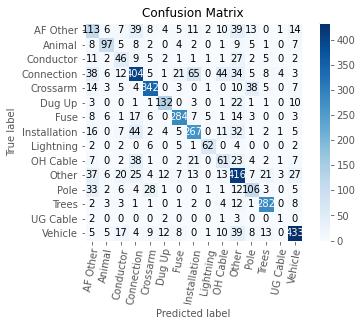

------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------
Fitting 10 folds for each of 3 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  3.0min finished


Random Forest

Best parameters: {'clf__max_depth': None, 'clf__max_features': 'sqrt', 'clf__n_estimators': 700}

Training cross-validation mean scores:
	balanced_accuracy       0.6307277797393006
	accuracy                0.7507363508676543
	precision_weighted      0.7496692281229114
	recall_weighted         0.7507363508676543
	f1_weighted             0.7297272333228662

Testing scores:
	balanced_accuracy       0.6319923139974565
	accuracy                0.7599911190053286


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	precision_weighted       0.755275737347168
	recall_weighted         0.7599911190053286
	f1_weighted             0.7414007601460344

              precision    recall  f1-score   support

    AF Other       0.64      0.46      0.54       272
      Animal       0.92      0.65      0.76       149
   Conductor       0.59      0.21      0.31       115
  Connection       0.68      0.82      0.74       650
    Crossarm       0.72      0.93      0.81       432
      Dug Up       0.93      0.89      0.91       175
        Fuse       0.84      0.87      0.85       355
Installation       0.75      0.81      0.77       397
   Lightning       0.92      0.67      0.77        84
    OH Cable       0.69      0.13      0.22       169
       Other       0.78      0.79      0.78       611
        Pole       0.70      0.43      0.53       202
       Trees       0.77      0.92      0.83       320
    UG Cable       0.00      0.00      0.00         9
     Vehicle       0.80      0.93      0.86       564

 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


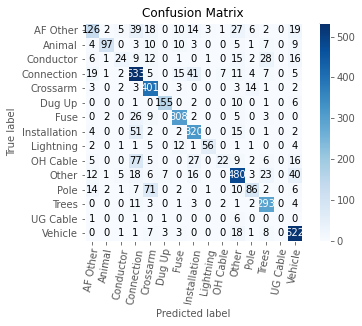

------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------
Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:   13.2s remaining:    5.6s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   16.9s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Logistic Regression

Best parameters: {'clf__C': 10}

Training cross-validation mean scores:
	balanced_accuracy       0.7038715609592672
	accuracy                0.7782410402790993
	precision_weighted      0.7767510936052587
	recall_weighted         0.7782410402790993
	f1_weighted             0.7755501004135945

Testing scores:
	balanced_accuracy       0.7168189424218003
	accuracy                0.7859680284191829
	precision_weighted      0.7858618421314849
	recall_weighted         0.7859680284191829
	f1_weighted             0.7846811544380601

              precision    recall  f1-score   support

    AF Other       0.57      0.55      0.56       272
      Animal       0.94      0.81      0.87       149
   Conductor       0.53      0.49      0.51       115
  Connection       0.72      0.73      0.72       650
    Crossarm       0.83      0.88      0.85       432
      Dug Up       0.90      0.94      0.92       175
        Fuse       0.87      0.86      0.87       355
Installation    

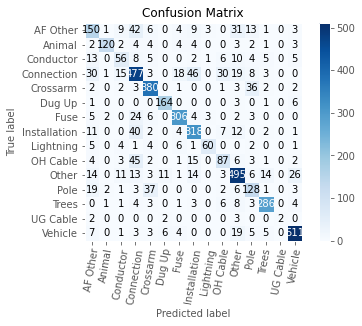

------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------
Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    8.1s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


SGD Classifier - hinge

Best parameters: {'clf__alpha': 0.0001, 'clf__l1_ratio': 0.2, 'clf__max_iter': 5, 'clf__penalty': 'elasticnet'}

Training cross-validation mean scores:
	balanced_accuracy       0.7044899384161828
	accuracy                0.7862349689637986
	precision_weighted      0.7819118297337229
	recall_weighted         0.7862349689637986
	f1_weighted              0.777823957799209

Testing scores:
	balanced_accuracy       0.7183941490452403
	accuracy                0.7970692717584369
	precision_weighted      0.7925896089818202
	recall_weighted         0.7970692717584369
	f1_weighted             0.7925049281002586

              precision    recall  f1-score   support

    AF Other       0.66      0.52      0.58       272
      Animal       0.88      0.87      0.88       149
   Conductor       0.58      0.43      0.49       115
  Connection       0.73      0.80      0.76       650
    Crossarm       0.85      0.89      0.87       432
      Dug Up       0.85      0.94      0.

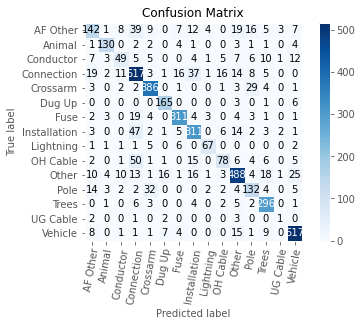

------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------
Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    8.8s finished


SGD Classifier - modified_huber

Best parameters: {'clf__alpha': 0.0001, 'clf__l1_ratio': 0.2, 'clf__max_iter': 1000, 'clf__penalty': 'elasticnet'}

Training cross-validation mean scores:
	balanced_accuracy       0.7049541236526797
	accuracy                 0.782142449367949
	precision_weighted      0.7782124517597911
	recall_weighted          0.782142449367949
	f1_weighted             0.7771761041460049

Testing scores:
	balanced_accuracy       0.7227735068579685
	accuracy                0.7890763765541741
	precision_weighted      0.7883693719209984
	recall_weighted         0.7890763765541741
	f1_weighted             0.7874875120826165

              precision    recall  f1-score   support

    AF Other       0.60      0.55      0.57       272
      Animal       0.95      0.85      0.90       149
   Conductor       0.54      0.44      0.49       115
  Connection       0.71      0.75      0.73       650
    Crossarm       0.86      0.86      0.86       432
      Dug Up       0.88      

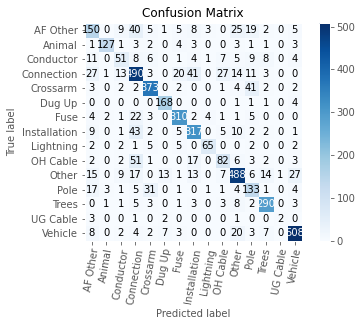

------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------
Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.9s finished


Naive Bayes

Best parameters: {'clf__alpha': 0.01}

Training cross-validation mean scores:
	balanced_accuracy       0.5731176465279485
	accuracy                0.6819256943500521
	precision_weighted       0.671089478212083
	recall_weighted         0.6819256943500521
	f1_weighted             0.6687911202783873

Testing scores:
	balanced_accuracy       0.5774813648404037
	accuracy                0.6942717584369449
	precision_weighted      0.6881664811130549


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	recall_weighted         0.6942717584369449
	f1_weighted              0.682718859547985



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

    AF Other       0.45      0.50      0.47       272
      Animal       0.72      0.66      0.69       149
   Conductor       0.42      0.24      0.31       115
  Connection       0.63      0.66      0.64       650
    Crossarm       0.71      0.84      0.77       432
      Dug Up       0.87      0.84      0.85       175
        Fuse       0.75      0.82      0.78       355
Installation       0.72      0.71      0.71       397
   Lightning       0.76      0.42      0.54        84
    OH Cable       0.63      0.15      0.25       169
       Other       0.75      0.79      0.77       611
        Pole       0.45      0.39      0.42       202
       Trees       0.67      0.81      0.74       320
    UG Cable       0.00      0.00      0.00         9
     Vehicle       0.82      0.84      0.83       564

    accuracy                           0.69      4504
   macro avg       0.62      0.58      0.58      4504
weighted avg       0.69   

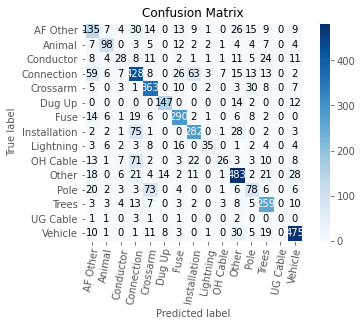

------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------
Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.9s finished


Bernoilli

Best parameters: {'clf__alpha': 0.01}

Training cross-validation mean scores:
	balanced_accuracy       0.5739692940762564
	accuracy                0.6447121562230983
	precision_weighted      0.6693853118263147
	recall_weighted         0.6447121562230983
	f1_weighted             0.6449723812543182

Testing scores:
	balanced_accuracy       0.5945236300541886
	accuracy                0.6507548845470693
	precision_weighted      0.6788656675243886
	recall_weighted         0.6507548845470693
	f1_weighted             0.6541728264048055

              precision    recall  f1-score   support

    AF Other       0.37      0.44      0.40       272
      Animal       0.53      0.68      0.60       149
   Conductor       0.27      0.40      0.32       115
  Connection       0.71      0.43      0.53       650
    Crossarm       0.77      0.65      0.70       432
      Dug Up       0.87      0.89      0.88       175
        Fuse       0.71      0.83      0.77       355
Installation       0

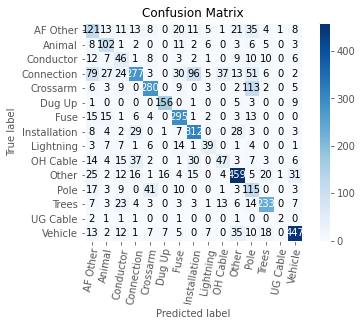

------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------
Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:  1.7min remaining:   42.9s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  3.2min finished


SVC - linear

Best parameters: {'clf__C': 10, 'clf__gamma': 0.1}

Training cross-validation mean scores:
	balanced_accuracy       0.6980345714219601
	accuracy                0.7663435277060396
	precision_weighted      0.7690680424321722
	recall_weighted         0.7663435277060396
	f1_weighted             0.7660218598823143

Testing scores:
	balanced_accuracy       0.7143851403368834
	accuracy                0.7755328596802842
	precision_weighted      0.7808552352038304
	recall_weighted         0.7755328596802842
	f1_weighted             0.7772290191656014

              precision    recall  f1-score   support

    AF Other       0.49      0.57      0.52       272
      Animal       0.94      0.79      0.86       149
   Conductor       0.48      0.50      0.49       115
  Connection       0.71      0.73      0.72       650
    Crossarm       0.83      0.86      0.85       432
      Dug Up       0.85      0.94      0.90       175
        Fuse       0.88      0.86      0.87       355
Inst

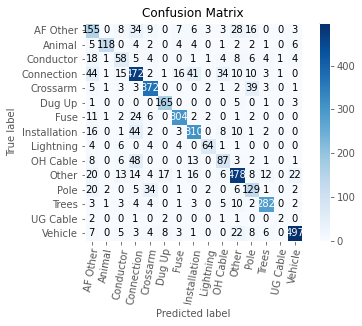

------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------
Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:  1.8min remaining:   45.9s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  3.4min finished


SVC - rbf

Best parameters: {'clf__C': 10, 'clf__gamma': 0.1}

Training cross-validation mean scores:
	balanced_accuracy       0.6993606904356218
	accuracy                0.7804315164695754
	precision_weighted      0.7797185993627328
	recall_weighted         0.7804315164695754
	f1_weighted              0.778020446082927

Testing scores:
	balanced_accuracy       0.7177787369413586
	accuracy                0.7901865008880995
	precision_weighted      0.7932206451231653
	recall_weighted         0.7901865008880995
	f1_weighted             0.7899678399085083

              precision    recall  f1-score   support

    AF Other       0.56      0.59      0.57       272
      Animal       0.95      0.77      0.85       149
   Conductor       0.54      0.53      0.54       115
  Connection       0.73      0.76      0.75       650
    Crossarm       0.84      0.88      0.86       432
      Dug Up       0.89      0.94      0.91       175
        Fuse       0.88      0.85      0.87       355
Install

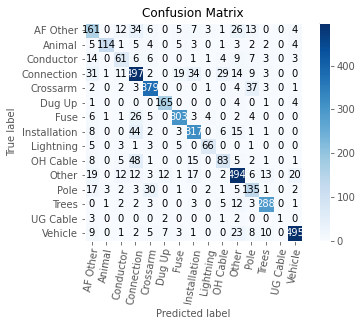

------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------
Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    1.3s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.0s finished


LinearSVC

Best parameters: {'clf__C': 1}

Training cross-validation mean scores:
	balanced_accuracy       0.7043084805983135
	accuracy                0.7817631280866295
	precision_weighted       0.777607885734068
	recall_weighted         0.7817631280866295
	f1_weighted             0.7768980110957244

Testing scores:
	balanced_accuracy       0.7193683324713577
	accuracy                0.7919626998223801
	precision_weighted      0.7897995083739378
	recall_weighted         0.7919626998223801
	f1_weighted             0.7892542196402108

              precision    recall  f1-score   support

    AF Other       0.60      0.53      0.56       272
      Animal       0.94      0.85      0.89       149
   Conductor       0.57      0.49      0.52       115
  Connection       0.71      0.75      0.73       650
    Crossarm       0.84      0.88      0.86       432
      Dug Up       0.88      0.94      0.91       175
        Fuse       0.88      0.87      0.87       355
Installation       0.77    

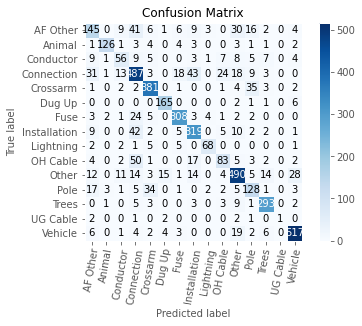

------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------
Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.8s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.3s finished


Perceptron

Best parameters: {'clf__alpha': 0.001}

Training cross-validation mean scores:
	balanced_accuracy       0.6640595627734609
	accuracy                0.7282746590548684
	precision_weighted      0.7281429158462533
	recall_weighted         0.7282746590548684
	f1_weighted             0.7252602192086754

Testing scores:
	balanced_accuracy       0.6614062555529289
	accuracy                0.7220248667850799
	precision_weighted      0.7420437750345258
	recall_weighted         0.7220248667850799
	f1_weighted             0.7288268684074025

              precision    recall  f1-score   support

    AF Other       0.49      0.45      0.47       272
      Animal       0.86      0.83      0.85       149
   Conductor       0.40      0.42      0.41       115
  Connection       0.66      0.68      0.67       650
    Crossarm       0.82      0.73      0.77       432
      Dug Up       0.87      0.89      0.88       175
        Fuse       0.86      0.79      0.83       355
Installation      

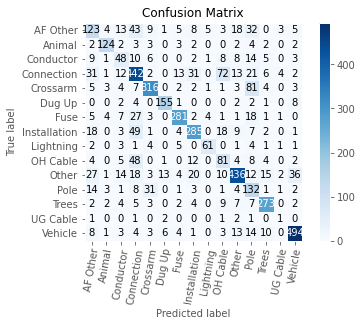

------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------


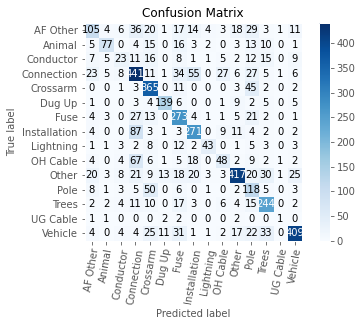

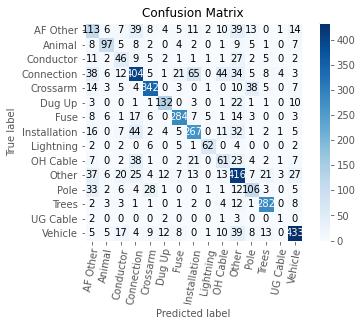

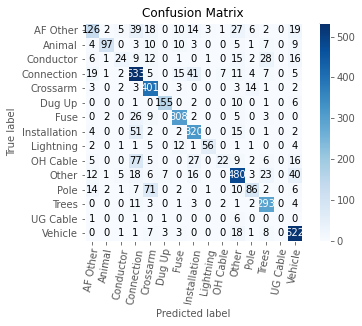

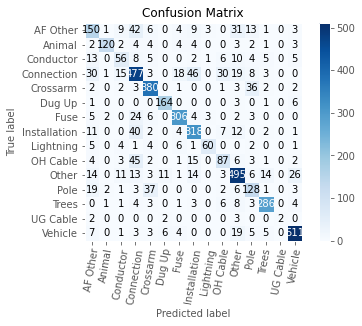

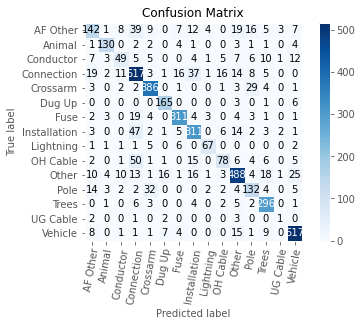

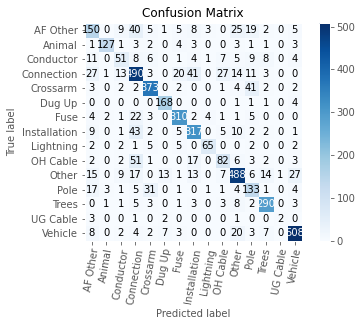

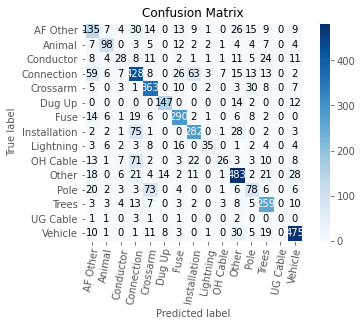

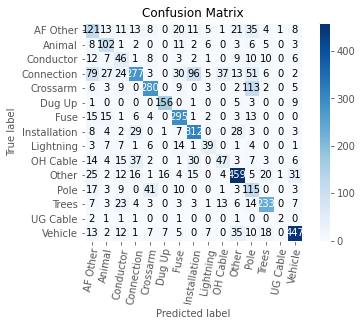

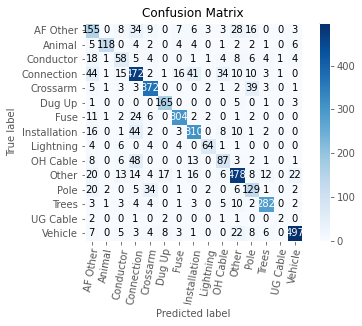

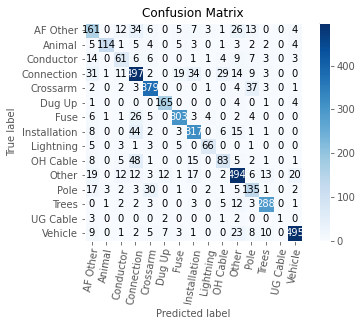

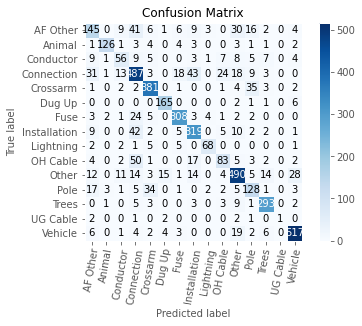

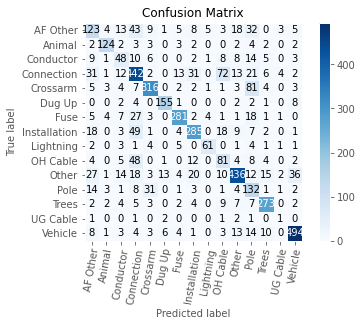

In [38]:
for i in range(0, len(models_with_hyperparameter_sets)):
    model_optimisation_and_testing(models_with_hyperparameter_sets[i], x_train_1, y_train_1, x_test_1, y_test_1)
print('------------------------------------------------------------------------------------------------------------------')
print('------------------------------------------------------------------------------------------------------------------')

In [33]:
for i in range(0, len(models_with_hyperparameter_sets)):
    category_prediction_analysis(models_with_hyperparameter_sets[i], 'UG Cable')

K-Nearest Neighbors

Actual category: UG Cable
Predicted category:
	 Crossarm
		Crossarm              0.42949805533929347
		AF Other              0.14684243819557316
		Vehicle               0.14254041270691575
		Pole                  0.14097649296867604
		OH Cable              0.14014260078954155

	 Connection
		Connection             0.7063236157355745
		Other                 0.15301450221515642
		OH Cable              0.14066188204926916

	 AF Other
		AF Other              0.28586566463623525
		Connection            0.28360828409384736
		Lightning               0.144741191467738
		Fuse                   0.1436753843515436
		Crossarm              0.14210947545063593

	 Dug Up
		Dug Up                 0.2841752729486964
		OH Cable              0.28378657855844963
		Other                 0.14712004801024905
		Installation          0.14299480838428838
		AF Other              0.14192329209831653

	 Other
		Other                 0.43095371842436214
		Dug Up                0.284892463221727

In [ ]:
random_state_a = 157
random_state_b = 9642

In [ ]:
print('------------------------------------------------------------------------------------------------------------------')
print('------------------------------------------------------------------------------------------------------------------')
for i in range(0, 2):#len(models_with_hyperparameter_sets)):
    cross_validation(models_with_hyperparameter_sets[i], 'lemmatized_combined_text', random_state_a, random_state_b)
print('------------------------------------------------------------------------------------------------------------------')
print('------------------------------------------------------------------------------------------------------------------')

In [ ]:
x_inputs = ['porter_stemmed_combined_text',
            'porter_stemmed_IncidentCause',
            'porter_stemmed_EventDescription',
            'snowball_stemmed_combined_text',
            'snowball_stemmed_IncidentCause',
            'snowball_stemmed_EventDescription',
            'lemmatized_combined_text',
            'lemmatized_IncidentCause',
            'lemmatized_EventDescription']

In [ ]:
#print('------------------------------------------------------------------------------------------------------------------')
#print('------------------------------------------------------------------------------------------------------------------')
#for i in range(0, len(models_with_hyperparameter_sets)):
#    for j in range(0, len(x_inputs)):
#        cross_validation(models_with_hyperparameter_sets[i], x_inputs[j], random_state_a, random_state_b)
#print('------------------------------------------------------------------------------------------------------------------')
#print('------------------------------------------------------------------------------------------------------------------')

In [36]:
ug_cable_list_indexes = [ i for i in range(len(y_test_1)) if y_test_1.values[i] == 'UG Cable' ]
ug_cable_list_indexes

[13, 506, 1062, 1090, 1564, 1572, 1674, 3861, 4491]

In [37]:
for ug_cable_list_index in ug_cable_list_indexes:
    print(x_test_1.values[ug_cable_list_index])
    print()

ug cable failure caused fire range road hepburn spring schedule vic fire reported wire started fire pile rubbish location arrival crew found house burned approx year ago u g service cable supplying house remained alive arced started fire fire burned area approx sq appears rubbish pile property reported injury crew isolated supply

schedule michael turning fire hydrant made contact fire hydrant one hand adjacent steel lighting pole hand test independent earth various point area including reported point contact distribution asset revealed insulation failure contained within light fitting pole condition caused voltage rise volt steel lighting pole general mass earth including fire hydrant fault truck disconnected removed replaced light fitting associated wiring cta tested pole vesi test passed

schedule two br br failed overheated cable pot head spilt pitch onto parked car barnett st br br supply isolated repair work carried jemena

incident tucker place caroline spring schedule customer 

In [38]:
ug_cable_indexes = [ i for i in y_test_1.index if y_test_1[i] == 'UG Cable' ]

In [39]:
for ug_cable_index in ug_cable_indexes:
    print(df.values[ug_cable_index])
    print()

[6681
 'UG cable failure caused fire at 7 Range Road, Hepburn Springs, 3461'
 'Schedule 1 Vic Fire reported wires down, which had started a fire in a pile of rubbish at the above location. On arrival the crew found that a house had burned down approx. 12 years ago and that the U/G service cable supplying that house, which had remained alive, had arced and started this fire. The fire had burned an area of approx. 25 sq. m of what appears to be rubbish in a pile on this property. There were no reported injuries. Crew isolated supply.'
 'UG Cable' Timestamp('2014-12-10 10:23:00')
 'ug cable failure caused fire range road hepburn springs schedule vic fire reported wires started fire pile rubbish location arrival crew found house burned approx years ago u g service cable supplying house remained alive arced started fire fire burned area approx sq appears rubbish pile property reported injuries crew isolated supply'
 'ug cable failure caused fire range road hepburn spring schedule vic fire r

In [ ]:
##################################################################################################################################################################################################################################
#Using whether the incident was prior to 2015 as an input variable

In [ ]:
#--Splitting the data into 70% training, 15% testing, 15% validation, keeps original 30% test set though
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(df[['lemmatized_text', 'prior_to_2015']], df['Category'], test_size = 0.3)
x_validate_2, x_test_half_2, y_validate_2, y_test_half_2 = train_test_split(x_test_2, y_test_2, test_size = 0.5)

#these are pandas series objects now, use .values to get the Categories

In [161]:
#--Really basic model testing, done without pipeline
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(x_train_2['lemmatized_text'])
print(X_train_counts.shape)

tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
print(X_train_tfidf.shape)

#Next 2 cells diverge from here

(10507, 14298)
(10507, 14298)


0.6034635879218473

In [162]:
clf = MultinomialNB().fit(X_train_tfidf, y_train_2)

X_new_counts = count_vect.transform(x_test_2['lemmatized_text'])
print(X_new_counts.shape)

X_new_tfidf = tfidf_transformer.transform(X_new_counts)
print(X_new_tfidf.shape)

predicted = clf.predict(X_new_tfidf)
np.mean(predicted == y_test_2)

In [ ]:
all_training_data = sparse.hstack((X_train_tfidf, x_train_2['prior_to_2015'][:,None]))

clf_2 = MultinomialNB().fit(all_training_data, y_train_2)

X_new_counts = count_vect.transform(x_test_2['lemmatized_text'])
print(X_new_counts.shape)

X_new_tfidf = tfidf_transformer.transform(X_new_counts)
print(X_new_tfidf.shape)

all_testing_data = sparse.hstack((X_new_tfidf, x_test_2['prior_to_2015'] [:,None])).A
print(all_testing_data.shape)

predicted = clf_2.predict(all_testing_data)
np.mean(predicted == y_test_2)

In [ ]:
#x_train_2['prior_to_2015'].to_numpy()

In [ ]:
#x_train_2['prior_to_2015'][:,None]

In [173]:
def model_optimisation_and_testing_2(model_list, x_train, y_train, x_test, y_test):
    #[0]: Model constructor
    #[1]: Model name/description
    #[2]: Hyperparameter dictionary
    #[3]: Whether the model has pedict_proba as a method
    #https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
    scoring_strategy = {'balanced_accuracy': make_scorer(balanced_accuracy_score),
                        'accuracy': make_scorer(accuracy_score),
                        'precision_weighted': make_scorer(precision_score, average = 'weighted'),
                        'recall_weighted': make_scorer(recall_score, average = 'weighted'),
                        'f1_weighted': make_scorer(f1_score, average = 'weighted')}
    
    primary_score = 'balanced_accuracy'
    
    cross_validation_folds = 10
    
    #text_clf = Pipeline([('vect', CountVectorizer()), 
    #                     ('tfidf', TfidfTransformer()), 
    #                     ('clf', model_list[0])])
    text_clf = Pipeline([('clf', model_list[0])])
    
    count_vect = CountVectorizer()
    x_train_counts = count_vect.fit_transform(x_train['lemmatized_text'])
    
    tfidf_transformer = TfidfTransformer()
    x_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
    
    x_train_data = sparse.hstack((x_train_tfidf, x_train['prior_to_2015'][:,None]))
    
    #clf = model_list[0].fit(x_train_data, y_train)

    optimised_text_clf = GridSearchCV(text_clf, 
                                      model_list[2], 
                                      cv = cross_validation_folds, 
                                      n_jobs = -1, 
                                      scoring = scoring_strategy, 
                                      refit = primary_score, 
                                      verbose = 2)
    
    trained_text_clf = optimised_text_clf.fit(x_train_data, y_train)
    model_list[4] = trained_text_clf
    
    x_test_counts = count_vect.transform(x_test['lemmatized_text'])
    
    x_test_tfidf = tfidf_transformer.transform(x_test_counts)
    
    x_test_data = sparse.hstack((x_test_tfidf, x_test['prior_to_2015'][:,None]))
    
    #Uses the best parameters gridsearchcv found
    predicted = trained_text_clf.predict(x_test_data)
    model_list[5] = predicted

    if model_list[3]:
        #Probabilities are for each category (given in the order of .classes_)
        predicted_probabilities = trained_text_clf.predict_proba(x_test_data)
        labelled_predicted_probabilities = []
        
        for i in range(0, len(predicted_probabilities)):
            labelled_predicted_probabilities.append(list(zip(trained_text_clf.classes_, predicted_probabilities[i])))
        
        model_list[6] = labelled_predicted_probabilities
    
    #best_index = np.nonzero(trained_text_clf.cv_results_['rank_test_%s' % primary_score] == 1)[0][0]
    best_index = np.nonzero(trained_text_clf.cv_results_[ f'rank_test_{primary_score}' ] == 1)[0][0]
    
    print(model_list[1])
    print()
    print('Best parameters:', trained_text_clf.best_params_)
    print()
    print('Training cross-validation mean scores:')
    
    for score_method in [*scoring_strategy]:
        #print('\t', score_method, trained_text_clf.cv_results_['mean_test_%s' % score_method][best_index])
        #print('\t', '{:<20}  {:>20}'.format(score_method, trained_text_clf.cv_results_['mean_test_%s' % score_method][best_index]))
        #print('\t', f'{score_method:<20}  {trained_text_clf.cv_results_[f"mean_test_{}" + str(score_method)][best_index]:>20}')
        print('\t' + f'{score_method:<20}  {trained_text_clf.cv_results_[ f"mean_test_{score_method}" ][best_index]:>20}')
    
    print()
    print('Testing scores:')
    #print('balanced_accuracy', trained_text_clf.score(x_test, y_test))
    
    for score_method in [*scoring_strategy]:
        #print('\t', score_method, scoring_strategy[score_method](trained_text_clf, x_test, y_test))
        if score_method == 'balanced_accuracy':
            print('\33[1m' + '\t' + f'{score_method:<20}  {scoring_strategy[score_method](trained_text_clf, x_test_data, y_test):>20}' + '\33[0m')
        else:
            print('\t' + f'{score_method:<20}  {scoring_strategy[score_method](trained_text_clf, x_test_data, y_test):>20}')
    
    print()
    print(classification_report(y_test, predicted)) #makes a space after
    
    print('------------------------------------------------------------------------------------------------------------------')
    print('------------------------------------------------------------------------------------------------------------------')

In [174]:
for i in range(0, 1):#len(models_with_hyperparameter_sets)):
    model_optimisation_and_testing_2(models_with_hyperparameter_sets[i], x_train_2, y_train_2, x_test_2, y_test_2)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   29.3s finished


K-Nearest Neighbors

Best parameters: {'clf__leaf_size': 25, 'clf__n_neighbors': 5, 'clf__weights': 'distance'}

Training cross-validation mean scores:
	balanced_accuracy       0.5603173383612619
	accuracy                 0.662892392732545
	precision_weighted      0.6752442886651228
	recall_weighted          0.662892392732545
	f1_weighted             0.6573693032087116

Testing scores:
	balanced_accuracy          0.5668149257309
	accuracy                0.6596358792184724
	precision_weighted      0.6760881360550343
	recall_weighted         0.6596358792184724
	f1_weighted             0.6566293516182591

              precision    recall  f1-score   support

    AF Other       0.57      0.38      0.46       301
      Animal       0.89      0.56      0.69       172
   Conductor       0.40      0.26      0.32       122
  Connection       0.62      0.68      0.65       615
    Crossarm       0.64      0.84      0.73       442
      Dug Up       0.87      0.75      0.80       212
        Fus

In [ ]:
for i in range(0, 1):#len(models_with_hyperparameter_sets)):
    category_prediction_analysis(models_with_hyperparameter_sets[i], y_test_2, 'UG Cable')